<a href="https://colab.research.google.com/github/ojmakinde/coding.13/blob/main/L04_Shelling_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L04: Implementing the Shelling Model](https://docs.google.com/document/d/1NtGAKnsfwLRYMYrL74aMVMtTuQRJ1oDjvSFWlmMjpzs/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: FIXME

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

It was a great learning experience and one that I found to be rather difficult at certain points. I was able to better understand the intricacies of the schelling model and it was also very interesting seeing the agents transform in behavior over time.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I worked on this alone.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

The Object Oriented Design Structure was a bit difficult to follow. I initially had a design that consisted of using 0's, 1's and a null value for all the different states. However, I was able to modify it to the OOP paradigm.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

None.

**TESTING**: Describe how you tested this work.

I was able to run it with different values and ensure that it worked the way I wanted it to. Through the testing I was able to see that certain parts of the logic needed work, and I was able improve them.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

Some values don't seem to work. If I use 1.0 for instance, the initial and final states are empty.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

Working on this lab provided an amazing learning experience into understanding how the model works. It was also very interesting to see and think up more optimized solutions than the one I implemented, interestingly.

## Import Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen
import random
import numpy as np

## The Schelling Model


Neighborhood Simulation Setup!
Enter grid length: 200
Enter grid breadth: 200

 The higher the density, the less space there is for migration.
Enter density (0-1): 0.3
Enter community A ratio (0-1): 0.5
Enter satisfaction threshold (0-1): 0.4

Initial State:


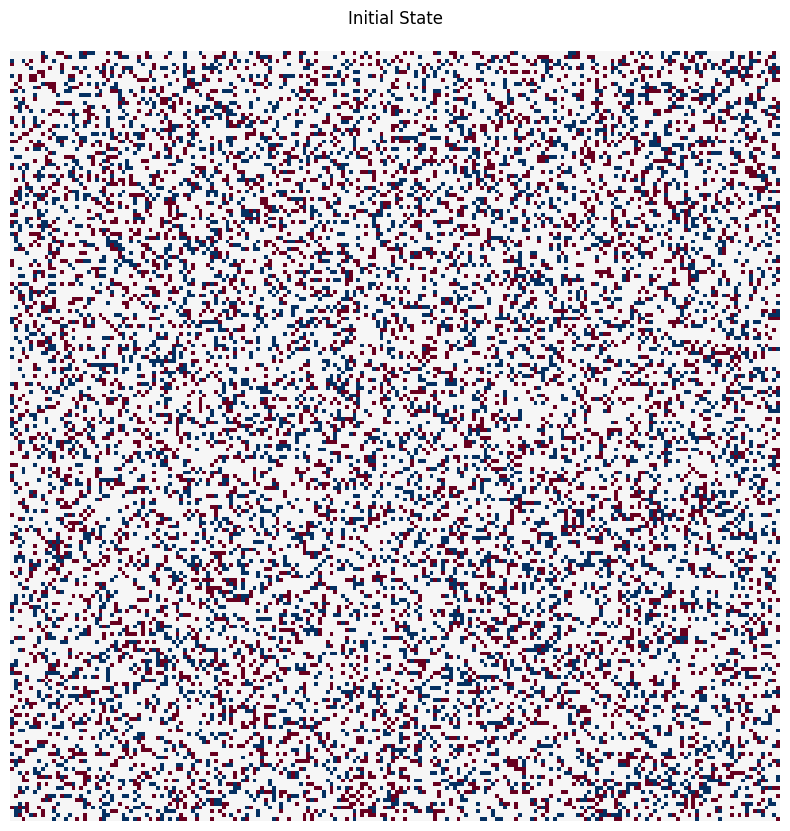


Final State:


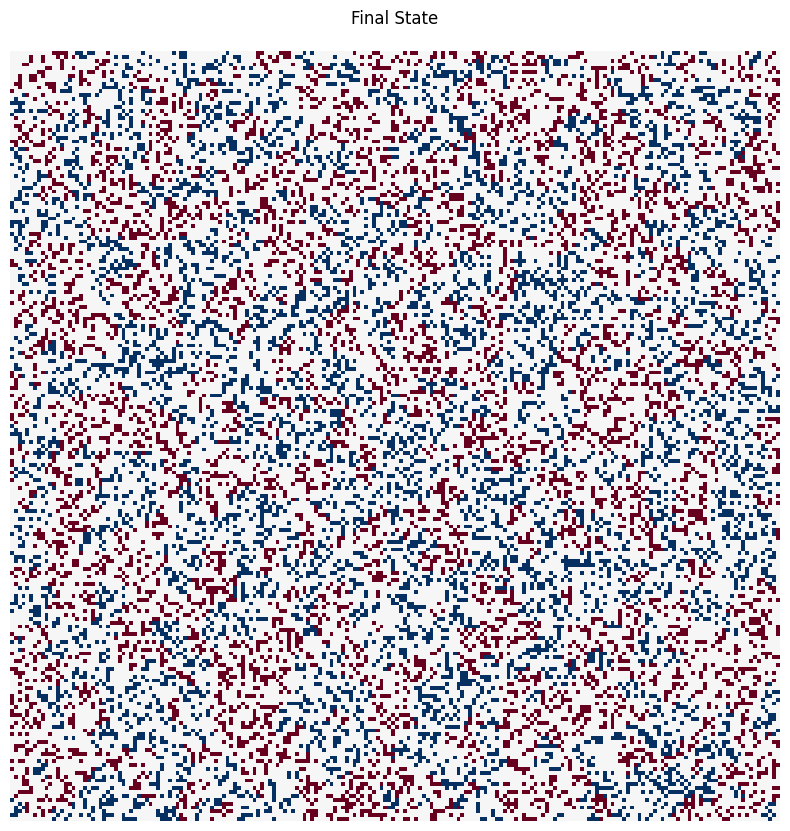

Total Relocations: 7164


In [32]:
class Resident:
    def __init__(self, community_type):
        self.community_type = community_type
        self.satisfied = False
        self.days_in_location = 0

class Neighborhood:
    def __init__(self, length, breadth, density, community_a_ratio, satisfaction_threshold):
        self.length = length
        self.breadth = breadth
        self.density = density
        self.community_a_ratio = community_a_ratio
        self.satisfaction_threshold = satisfaction_threshold
        self.neighborhood_map = []
        self.available_locations = []
        self.relocation_count = 0
        self._create_neighborhood()

    def _create_neighborhood(self):
        total_spaces = self.length * self.breadth
        occupied_spaces = int(total_spaces * self.density)
        community_a_count = int(occupied_spaces * self.community_a_ratio)
        community_b_count = occupied_spaces - community_a_count

        residents = (
            [Resident('Community_A') for _ in range(community_a_count)] +
            [Resident('Community_B') for _ in range(community_b_count)]
        )
        random.shuffle(residents)

        self.neighborhood_map = [[None for _ in range(self.length)]
                               for _ in range(self.breadth)]

        all_locations = [(x, y) for x in range(self.breadth)
                        for y in range(self.length)]
        random.shuffle(all_locations)

        for i, loc in enumerate(all_locations[:occupied_spaces]):
            x, y = loc
            self.neighborhood_map[x][y] = residents[i]

        self.available_locations = all_locations[occupied_spaces:]

    def _check_surroundings(self, x, y):
        similar_neighbors = 0
        total_neighbors = 0
        resident = self.neighborhood_map[x][y]

        for dx in [-2, -1, 0, 1, 2]:
            for dy in [-2, -1, 0, 1, 2]:
                if dx == 0 and dy == 0:
                    continue

                new_x, new_y = x + dx, y + dy
                if (0 <= new_x < self.breadth and
                    0 <= new_y < self.length and
                    self.neighborhood_map[new_x][new_y]):

                    total_neighbors += 1
                    if (self.neighborhood_map[new_x][new_y].community_type ==
                        resident.community_type):
                        similar_neighbors += 1

        return (similar_neighbors / total_neighbors >= self.satisfaction_threshold
                if total_neighbors > 0 else False)

    def _relocate_resident(self, x, y):
        if not self.available_locations:
            return False

        new_location = random.choice(self.available_locations)
        self.available_locations.remove(new_location)
        self.available_locations.append((x, y))

        new_x, new_y = new_location
        self.neighborhood_map[new_x][new_y] = self.neighborhood_map[x][y]
        self.neighborhood_map[x][y] = None
        self.relocation_count += 1
        return True

    def simulate_movement(self, max_iterations=100):
        for iteration in range(max_iterations):
            relocations = 0

            for x in range(self.breadth):
                for y in range(self.length):
                    if (self.neighborhood_map[x][y] and
                        not self._check_surroundings(x, y)):
                        if self._relocate_resident(x, y):
                            relocations += 1

            if relocations == 0:
                break

    def visualize_neighborhood(self, title="Neighborhood Map"):
        display_map = np.zeros((self.breadth, self.length))

        for x in range(self.breadth):
            for y in range(self.length):
                if self.neighborhood_map[x][y]:
                    display_map[x][y] = (1 if self.neighborhood_map[x][y].community_type
                                       == 'Community_A' else -1)

        plt.figure(figsize=(10, 10))
        img = plt.imshow(display_map, cmap='RdBu')
        plt.title(title, pad=20)
        plt.axis('off')
        plt.colorbar(img).remove()
        plt.show()

def run_simulation():
    print("\nNeighborhood Simulation Setup!")
    length = int(input("Enter grid length: "))
    breadth = int(input("Enter grid breadth: "))
    print("\n The higher the density, the less space there is for migration.")
    density = float(input("Enter density (0-1): "))
    community_a_ratio = float(input("Enter community A ratio (0-1): "))
    satisfaction_threshold = float(input("Enter satisfaction threshold (0-1): "))

    neighborhood = Neighborhood(length, breadth, density, community_a_ratio, satisfaction_threshold)

    print("\nInitial State:")
    neighborhood.visualize_neighborhood("Initial State")

    neighborhood.simulate_movement()

    print("\nFinal State:")
    neighborhood.visualize_neighborhood("Final State")
    print(f"Total Relocations: {neighborhood.relocation_count}")

if __name__ == "__main__":
    run_simulation()

## Integrity statement

Please briefly describe all references you used, all help you received and all help you gave to others in completing this assignment. Be sure to say that you got no help if you got none.

I got no help.